In [1]:
# load libraris 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import platform #운영 체제 
import seaborn as sns
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False 

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path="c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system')

import warnings
warnings.filterwarnings(action='ignore')    

# plot
import seaborn as sns
    
# Split    
from sklearn.model_selection import train_test_split

#Scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

#metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import *

# model
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV, cross_validate

#Regression statsmodel
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# time
import time

# itertools
import itertools

import scipy

from sklearn.svm import SVR
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV, cross_validate

# load Data

In [2]:
data=pd.read_csv('../data/onion_columns_all_merge_final.csv')
df=data.iloc[:,3:]
df.head()

,10a당 생산량 (kg),평균기온 7월,평균기온 8월,평균기온 9월,평균기온 10월,평균기온 11월,평균기온 12월,평균기온 1월,평균기온 2월,평균기온 3월,...,6월 아황산가스,6가크롬 Cr6+,구리 Cu,납 Pb,니켈 Ni,비소 As,수소이온농도 pH,수은 Hg,아연 Zn,카드뮴 Cd
0,7163,23.338710,24.974194,22.696667,18.777419,11.066667,5.390323,2.954839,5.782143,7.812903,...,0.006,0.26250,11.283000,15.933500,8.850500,3.274000,3.044500,0.016500,36.433500,0.644500
1,7393,25.225806,27.877419,24.143333,18.245161,11.280000,5.177419,-0.677419,6.114286,7.200000,...,0.007,0.26250,9.805500,12.074500,7.564500,2.942000,3.077000,0.020500,40.263000,0.423500
2,6303,25.083871,25.783871,23.286667,17.570968,14.080000,4.429032,2.832258,2.762069,8.274194,...,0.006,0.03655,11.999208,12.884742,7.380313,3.283697,3.314846,0.014766,37.487552,0.083297
3,8265,25.525806,27.519355,22.160000,17.777419,10.106667,2.929032,2.538710,4.700000,10.203226,...,0.008,0.04650,11.723000,10.608000,7.665000,3.269500,3.149500,0.013500,39.935000,0.070000
4,7271,26.080645,27.961290,23.683333,18.941935,10.900000,5.435484,4.958065,5.835714,9.822581,...,0.007,0.08350,9.375500,11.165000,8.787500,3.269500,3.224500,0.016500,41.049500,0.068000


### 앞부분 ElasticNet 분석에서 변수 추출한 결과물 loading  후 column만 따로 추출하여 Modeling 돌린다.

In [3]:
elastic=pd.read_csv('../data/elastic_data.csv')
elastic.head()

,year_local,area,year,10a당 생산량 (kg),3월 일산화탄소,10월 이산화질소,11월 일산화탄소,12월 아황산가스,습도 1월,12월 일산화탄소,4월 일산화탄소,강수량 5월,일조시간 8월,2월 오존,최고기온 3월,일조시간 7월,최고기온 2월,아연 Zn
0,2010_부산광역시,부산광역시,2010,7163,0.4,0.021,0.466667,0.006333,40.709677,0.466667,0.4,6.025806,4.451613,0.024,11.545161,2.709677,10.010714,36.433500
1,2011_부산광역시,부산광역시,2011,7393,0.4,0.019,0.500000,0.007000,33.645161,0.500000,0.4,5.483871,6.903226,0.024,12.522581,5.322581,10.860714,40.263000
2,2012_부산광역시,부산광역시,2012,6303,0.4,0.021,0.400000,0.006000,41.774194,0.400000,0.4,1.164516,3.903226,0.022,12.319355,5.677419,7.196552,37.487552
3,2013_부산광역시,부산광역시,2013,8265,0.5,0.023,0.500000,0.006000,41.709677,0.500000,0.4,6.483871,7.064516,0.025,14.683871,7.225806,9.278571,39.935000
4,2014_부산광역시,부산광역시,2014,7271,0.4,0.018,0.400000,0.007000,41.419355,0.400000,0.4,4.706452,9.258065,0.027,14.509677,7.096774,9.921429,41.049500


In [4]:
elastic=elastic.iloc[:,3:]
col=elastic.columns
col

Index(['10a당 생산량 (kg)', '3월 일산화탄소', '10월 이산화질소', '11월 일산화탄소', '12월 아황산가스',
       '습도 1월', '12월 일산화탄소', '4월 일산화탄소', '강수량 5월', '일조시간 8월', '2월 오존',
       '최고기온 3월', '일조시간 7월', '최고기온 2월', '아연 Zn'],
      dtype='object')

# Winsor

In [5]:
winsor = scipy.stats.mstats.winsorize

df_ws = pd.DataFrame()
for i in range(len(df.columns)):
    a = pd.DataFrame(winsor(df.iloc[:, i], limits = [0.01, 0.01]))
    df_ws = pd.concat([df_ws, a], axis = 1)
df_ws.columns=df.columns
df_ws

,10a당 생산량 (kg),평균기온 7월,평균기온 8월,평균기온 9월,평균기온 10월,평균기온 11월,평균기온 12월,평균기온 1월,평균기온 2월,평균기온 3월,...,6월 아황산가스,6가크롬 Cr6+,구리 Cu,납 Pb,니켈 Ni,비소 As,수소이온농도 pH,수은 Hg,아연 Zn,카드뮴 Cd
0,7163,23.338710,24.974194,22.696667,18.777419,11.066667,5.390323,2.954839,5.782143,7.812903,...,0.006,0.26250,11.283000,15.933500,8.850500,3.274000,3.044500,0.016500,36.433500,0.644500
1,7393,25.225806,27.877419,23.692222,18.245161,11.280000,5.177419,-0.677419,6.114286,7.200000,...,0.007,0.26250,9.805500,12.074500,7.564500,2.942000,3.077000,0.020500,40.263000,0.423500
2,6303,25.083871,25.783871,23.286667,17.570968,14.080000,4.429032,2.832258,2.762069,8.274194,...,0.006,0.03655,11.999208,12.884742,7.380313,3.283697,3.314846,0.014766,37.487552,0.083297
3,8265,25.525806,27.519355,22.160000,17.777419,10.106667,2.929032,2.538710,4.700000,10.203226,...,0.008,0.04650,11.723000,10.608000,7.665000,3.269500,3.149500,0.013500,39.935000,0.070000
4,7271,26.080645,27.961290,23.683333,18.941935,10.900000,5.435484,4.958065,5.835714,9.822581,...,0.007,0.08350,9.375500,11.165000,8.787500,3.269500,3.224500,0.016500,41.049500,0.068000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,7220,20.651220,21.475000,18.195833,14.800000,10.260870,6.157258,5.483607,5.778182,8.078226,...,0.003,0.11150,9.375500,10.639500,6.239000,2.824000,3.224500,0.010500,39.956000,0.068000
140,6552,18.645161,18.799194,17.715000,14.670732,10.738333,5.523387,5.813223,5.457143,7.720968,...,0.003,0.07400,11.724500,11.046500,6.239000,2.862000,3.263000,0.027000,47.105500,0.084000
141,6458,18.489216,18.799194,15.954167,14.166129,11.287500,7.399194,4.473387,5.337931,7.605645,...,0.004,0.07200,12.352000,9.861000,8.147000,2.749000,3.126000,0.009500,47.105500,0.078000
142,6945,25.326804,27.969892,23.692222,19.732258,13.033333,9.384848,6.861290,7.041667,9.821505,...,0.003,0.07200,12.878000,8.801500,7.114500,2.556000,3.179000,0.019000,42.516000,0.044000


# MinMaxScaling

In [6]:
def scaling(df):
    scaler=MinMaxScaler()
    df_sc=scaler.fit_transform(df)
    return df_sc

In [7]:
df_scaled=pd.DataFrame(scaling(df_ws),
                       columns=df_ws.columns)
df_scaled

,10a당 생산량 (kg),평균기온 7월,평균기온 8월,평균기온 9월,평균기온 10월,평균기온 11월,평균기온 12월,평균기온 1월,평균기온 2월,평균기온 3월,...,6월 아황산가스,6가크롬 Cr6+,구리 Cu,납 Pb,니켈 Ni,비소 As,수소이온농도 pH,수은 Hg,아연 Zn,카드뮴 Cd
0,0.733774,0.493006,0.604198,0.874665,0.895347,0.709291,0.720025,0.721721,0.873414,0.646875,...,0.363636,0.556842,0.163447,0.374061,0.242348,0.211434,0.000000,0.222406,0.030460,0.539870
1,0.772750,0.684850,0.888266,1.000000,0.837010,0.729872,0.705103,0.462975,0.906795,0.569220,...,0.454545,0.556842,0.036845,0.171663,0.123007,0.113668,0.011007,0.349495,0.118132,0.341184
2,0.588036,0.670421,0.683421,0.948943,0.763117,1.000000,0.652648,0.712989,0.569887,0.705321,...,0.363636,0.013351,0.224817,0.214159,0.105914,0.214290,0.091563,0.167329,0.054592,0.035329
3,0.920522,0.715349,0.853231,0.807101,0.785745,0.616675,0.547514,0.692078,0.764655,0.949729,...,0.545455,0.037283,0.201149,0.094748,0.132333,0.210109,0.035562,0.127089,0.110623,0.023375
4,0.752076,0.771754,0.896473,0.998881,0.913379,0.693212,0.723190,0.864422,0.878798,0.901501,...,0.454545,0.126282,0.000000,0.123962,0.236502,0.210109,0.060964,0.222406,0.136138,0.021577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0.743433,0.219792,0.261816,0.308032,0.459412,0.631552,0.773779,0.901860,0.873016,0.680492,...,0.090909,0.193632,0.000000,0.096400,0.000000,0.078920,0.060964,0.031772,0.111104,0.021577
140,0.630232,0.015854,0.000000,0.247498,0.445244,0.677615,0.729351,0.925340,0.840750,0.635227,...,0.090909,0.103431,0.201278,0.117746,0.000000,0.090110,0.074003,0.556014,0.274783,0.035961
141,0.614303,0.000000,0.000000,0.025818,0.389938,0.730596,0.860826,0.829896,0.828769,0.620616,...,0.181818,0.098620,0.255046,0.055569,0.177063,0.056834,0.027603,0.000000,0.274783,0.030567
142,0.696831,0.695118,0.897315,1.000000,1.000000,0.899024,1.000000,1.000000,1.000000,0.901365,...,0.090909,0.098620,0.300117,0.000000,0.081247,0.000000,0.045553,0.301836,0.169712,0.000000


# X, y  분리

In [8]:
X = df_scaled[col[1:]]
X.head(3)

,3월 일산화탄소,10월 이산화질소,11월 일산화탄소,12월 아황산가스,습도 1월,12월 일산화탄소,4월 일산화탄소,강수량 5월,일조시간 8월,2월 오존,최고기온 3월,일조시간 7월,최고기온 2월,아연 Zn
0,0.25,0.461538,0.277778,0.619048,0.107322,0.238095,0.333333,0.918055,0.252383,0.333333,0.442117,0.026882,0.897678,0.030460
1,0.25,0.384615,0.333333,0.714286,0.000000,0.285714,0.333333,0.828222,0.633718,0.333333,0.551433,0.462366,1.000000,0.118132
2,0.25,0.461538,0.166667,0.571429,0.136175,0.142857,0.333333,0.112237,0.167085,0.259259,0.528704,0.521505,0.558912,0.054592


In [9]:
y = df_scaled[col[0]]
y.head(3)

0    0.733774
1    0.772750
2    0.588036
Name: 10a당 생산량 (kg), dtype: float64

# Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=.2,
                                                    random_state= 42)
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('\ny_train',y_train.shape)
print('y_test',y_test.shape)

X_train (115, 14)
X_test (29, 14)

y_train (115,)
y_test (29,)


# XGBoost

## Model 선언

In [11]:
model=XGBRegressor(learning_rate=0.0292,
                   max_depth=2,
                   n_estimators=1000)

## Model 훈련

In [12]:
model.fit(X_train,y_train)

[11:57:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.0292, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [13]:
model.score(X_test,y_test)

0.5135880551883265

In [14]:
mean_squared_error(y_test,model.predict(X_test))

0.023386806866072758

In [15]:
np.sqrt(mean_squared_error(y_test,model.predict(X_test)))

0.15292745622049939

In [16]:
r2_score(y_test,model.predict(X_test))

0.5135880551883265

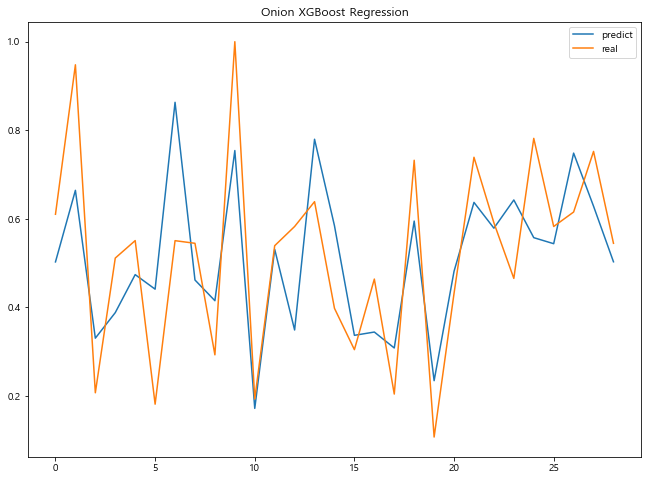

In [17]:
plt.figure(figsize=(11,8))
plt.plot(range(len(X_test)),model.predict(X_test), label='predict')
plt.plot(range(len(X_test)), y_test, label='real')
plt.title('Onion XGBoost Regression')
plt.legend()         
plt.show()         

In [18]:
xgb=XGBRegressor()

xgb_param_grid={
    'n_estimator' : list(range(1000,2000,100)),
    'learning_rate' : list(np.arange(0.026,0.03, 0.0001)),
    'max_depth' : list(range(1,4,1))
}

In [19]:
xgb_grid = GridSearchCV(xgb,
                        param_grid=xgb_param_grid,
                        n_jobs=-1,
                        verbose=1,
                        scoring='r2')
xgb_grid.fit(X_train, y_train)

Fitting 3 folds for each of 1200 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 810 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 2310 tasks      | elapsed:   13.9s


[11:58:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed:   20.1s finished
C:\Users\sundooedu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_sta...
                                           0.028099999999999986,
                                           0.028199999999999985,
                                           0.028299999999999985,
                                           0.028399999999999984,
                                           0.028499999999999984,
                                      

In [20]:
print('final params:', xgb_grid.best_params_)
print('best score:', xgb_grid.best_score_)

final params: {'learning_rate': 0.02919999999999998, 'max_depth': 2, 'n_estimator': 1000}
best score: 0.3699516814504228


In [21]:
cv_result_df = pd.DataFrame(xgb_grid.cv_results_)
cv_result_df.sort_values(by=['rank_test_score'], inplace=True)

In [22]:
cv_result_df[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
971,"{'learning_rate': 0.02919999999999998, 'max_de...",0.369952,1
972,"{'learning_rate': 0.02919999999999998, 'max_de...",0.369952,1
973,"{'learning_rate': 0.02919999999999998, 'max_de...",0.369952,1
974,"{'learning_rate': 0.02919999999999998, 'max_de...",0.369952,1
970,"{'learning_rate': 0.02919999999999998, 'max_de...",0.369952,1
...,...,...,...
4,"{'learning_rate': 0.026, 'max_depth': 1, 'n_es...",0.297392,1191
3,"{'learning_rate': 0.026, 'max_depth': 1, 'n_es...",0.297392,1191
2,"{'learning_rate': 0.026, 'max_depth': 1, 'n_es...",0.297392,1191
1,"{'learning_rate': 0.026, 'max_depth': 1, 'n_es...",0.297392,1191


In [23]:
cv_result=cv_result_df[['params','mean_test_score','rank_test_score']]
cv_result.to_csv('../data/cv_result.csv',index=False)

# XGBR

In [24]:
def xgb_reg(X_train,y_train,X_test,y_test):
  #최적의 파라미터 추출
    tic=time.time()
    xgb_param_grid={
        'n_estimator' : list(range(1000,2000,100)),
        'learning_rate' : list(np.arange(0.0260,0.031, 0.0001)),
        'max_depth' : list(range(1,4,1))}
    xgb = GridSearchCV(XGBRegressor(),
                        param_grid=xgb_param_grid,
                        n_jobs=-1,
                        verbose=1,
                        scoring='r2')
    xgb_result = xgb.fit(X_train,y_train)
    best_params = xgb_result.best_params_
    
    #최적의 모델
    best_xgb = XGBRegressor(learning_rate=best_params["learning_rate"], 
                           max_depth=best_params["max_depth"], 
                           n_estimators=best_params["n_estimator"],
                           verbose=1, 
                           max_iter=10000)
    #최적의 모델로 데이터 핏팅
    best_xgb.fit(X_train, y_train)
    y_pred = best_xgb.predict(X_test)
    toc=time.time()
    #점수 저장 
    global R_xgb, MAE_xgb, RMSE_xgb
    R_xgb = round(best_xgb.score(X_test,y_test),3)
    MAE_xgb = round(mean_absolute_error(y_test,y_pred),3)
    RMSE_xgb = round(np.sqrt(mean_squared_error(y_test,y_pred)),3)
    
    
    return (best_xgb.score(X_test,y_test),
            mean_absolute_error(y_test,y_pred),
            np.sqrt(mean_squared_error(y_test,y_pred)),
            (toc-tic))
            
    '''
    #scoring = { 'abs_error': 'neg_mean_absolute_error',
               'squared_error': 'neg_mean_squared_error',
                'R-squared':'r2'}
        
    # scores = cross_validate(best_xgb, X, y, cv=5, scoring=scoring, return_train_score=True)
    
    global MAE_xgb, RMSE_xgb, R2_xgb
    MAE_xgb = abs(scores['test_abs_error'].mean())
    RMSE_xgb = np.sqrt(abs(scores['test_squared_error'].mean()))
    R2_xgb = scores['test_R-squared'].mean()
    
    return (scores,
            "Training MAE: ",abs(scores['train_abs_error'].mean()), 
        "Training RMSE:", np.sqrt(abs(scores['train_squared_error'].mean())),
        "Test MAE: ", abs(scores['test_abs_error'].mean()), 
        "Test RMSE:", np.sqrt(abs(scores['test_squared_error'].mean())),
        "R-square:", scores['test_R-squared'].mean())
        
    '''   
xgb_reg(X_train, y_train, X_test, y_test)

Fitting 3 folds for each of 1530 candidates, totalling 4590 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 2240 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 4590 out of 4590 | elapsed:   21.9s finished
C:\Users\sundooedu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[11:58:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:58:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.5205220655504812,
 0.12747810267055704,
 0.15183352044009493,
 22.321037530899048)

# Linear Regression 

In [25]:
#%% Modeling1. Linear Regression 
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_train_pred = regressor.predict(X_train)

#MSE, RMSE 
print('\nTest MAE:', mean_absolute_error(y_test, y_pred))  
print('Test MSE:',mean_squared_error(y_test, y_pred))  
print('Test RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

#R-squared 
print('Test R:', r2_score(y_test,y_pred))

MAE_lr =  round(mean_absolute_error(y_test, y_pred),3)
RMSE_lr = round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
R_lr = round(r2_score(y_test,y_pred),3)


Test MAE: 0.13311250089916707
Test MSE: 0.024623165782142492
Test RMSE: 0.15691770385186782
Test R: 0.48787356802919446


# SVR_Li

In [26]:
#%% Modeling2. SVR  
#SVR kernel='linear'
def svr_model_lr(X_train, y_train, X_test, y_test):
    tic=time.time()
    #best parameter extraction
    gsc = GridSearchCV(
        estimator=SVR(kernel='linear'),
        param_grid={
            'C': [0.1, 1, 100, 1000],
            'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]},
        cv=10, scoring='r2', verbose=0, n_jobs=-1)

    grid_result = gsc.fit(X_train, y_train)
    best_params = grid_result.best_params_
    
    #best model
    best_svr = SVR(kernel='rbf', C=best_params["C"], epsilon=best_params["epsilon"], gamma='auto',
                   coef0=0.1, shrinking=True,
                   tol=0.001, cache_size=200, verbose=False, max_iter=10000)
    
    #Fitting based on best model
    best_svr.fit(X_train, y_train)
    y_pred = best_svr.predict(X_test)
    toc=time.time()
    #socres 
    global R_svr_li, MAE_svr_li, RMSE_svr_li
    R_svr_li = round(best_svr.score(X_test,y_test),3)
    MAE_svr_li = round(mean_absolute_error(y_test,y_pred),3)
    RMSE_svr_li = round(np.sqrt(mean_squared_error(y_test,y_pred)),3)
        
    return ('Rsquare:',best_svr.score(X_test,y_test),
             'MAE:',mean_absolute_error(y_test,y_pred),
             'RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)),
             'Time:',toc-tic)

#Training 
svr_model_lr(X_train,y_train,X_test,y_test)

C:\Users\sundooedu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


('Rsquare:',
 0.44721586688128184,
 'MAE:',
 0.13540610837710926,
 'RMSE:',
 0.16302759929085583,
 'Time:',
 22.514098644256592)

# SVR_rbf

In [27]:
#SVR kernel='rbf'
def svr_model_rbf(X_train, y_train, X_test, y_test):
    tic=time.time()
    gsc = GridSearchCV(
        estimator=SVR(kernel='rbf'),
        param_grid={
            'C': [0.1, 1, 100, 1000],
            'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
            'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]},
        cv=10, scoring='r2', verbose=0, n_jobs=-1)

    grid_result = gsc.fit(X_train, y_train)
    best_params = grid_result.best_params_
    best_svr_rbf = SVR(kernel='rbf', C=best_params["C"], epsilon=best_params["epsilon"], gamma=best_params["gamma"],
                   coef0=0.1, shrinking=True,
                   tol=0.001, cache_size=200, verbose=False, max_iter=10000)
    
    #Fitting based on best model
    best_svr_rbf.fit(X_train, y_train)
    y_pred = best_svr_rbf.predict(X_test)
    toc=time.time()
    #socres 
    global R_svr_rbf, MAE_svr_rbf, RMSE_svr_rbf
    R_svr_rbf = round(best_svr_rbf.score(X_test,y_test),3)
    MAE_svr_rbf = round(mean_absolute_error(y_test,y_pred),3)
    RMSE_svr_rbf = round(np.sqrt(mean_squared_error(y_test,y_pred)),3)
        
    return ('Rsquare:',best_svr_rbf.score(X_test,y_test),
             'MAE:',mean_absolute_error(y_test,y_pred),
             'RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)),
             'Time:',toc-tic)
    
#Training 
svr_model_rbf(X_train, y_train, X_test, y_test)

C:\Users\sundooedu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


('Rsquare:',
 0.5255119058113862,
 'MAE:',
 0.12500870782807133,
 'RMSE:',
 0.15104140218076842,
 'Time:',
 2.4883453845977783)

In [28]:
print('=====Linear Regression====')
print('MAE:', MAE_lr)
print('RMSE:', RMSE_lr)
print('R-squared', R_lr)

print('====SVR kernel linear====')
print('MAE:', MAE_svr_li)
print('RMSE:', RMSE_svr_li)
print('R-squared', R_svr_li)

print('====SVR kernel rbf====')
print('MAE:', MAE_svr_rbf)
print('RMSE:', RMSE_svr_rbf)
print('R-squared', R_svr_rbf)

print('====XgBoost====')
print('MAE:', MAE_xgb)
print('RMSE:', RMSE_xgb)
print('R-squared', R_xgb)

=====Linear Regression====
MAE: 0.133
RMSE: 0.157
R-squared 0.488
====SVR kernel linear====
MAE: 0.135
RMSE: 0.163
R-squared 0.447
====SVR kernel rbf====
MAE: 0.125
RMSE: 0.151
R-squared 0.526
====XgBoost====
MAE: 0.127
RMSE: 0.152
R-squared 0.521
